# **Cryptography - Edgar Allan Poe's The Gold Bug**

###The following script has the aim to reproduce in a computational way the cryptogram around which Edgar Allan Poe's tale The Gold Bug resolves. It belongs to the third chapter of the Rebecca Guolo's Bachelor thesis "Debugging Edgar Allan Poe's cryptography".

####*Frequency analysis of Poe's cryptogram.*  
Firstly, it is shown the cryptogram found by Legrand, rendered as a list in order to carry on further investigations. Moreover, it is printed the number of the symbols that make it up. 

In [84]:
PoeCiphertext = "53‡‡†305))6*;4826)4‡.)4‡);806*;48†8¶60))85;1‡(;:‡*8†83(88)5*†;46(;88*96*?;8)*‡(;485);5*†2:*‡(;4956*2(5*—4)8¶8*;4069285);)6†8)4‡‡;1(‡9;48081;8:8‡1;48†85;4)485†528806*81(‡9;48;(88;4(‡?34;48)4‡;161;:188;‡?;"
print(PoeCiphertext)

PoeCryptogram = list(PoeCiphertext)
print(PoeCryptogram)

print(len(PoeCryptogram))

53‡‡†305))6*;4826)4‡.)4‡);806*;48†8¶60))85;1‡(;:‡*8†83(88)5*†;46(;88*96*?;8)*‡(;485);5*†2:*‡(;4956*2(5*—4)8¶8*;4069285);)6†8)4‡‡;1(‡9;48081;8:8‡1;48†85;4)485†528806*81(‡9;48;(88;4(‡?34;48)4‡;161;:188;‡?;
['5', '3', '‡', '‡', '†', '3', '0', '5', ')', ')', '6', '*', ';', '4', '8', '2', '6', ')', '4', '‡', '.', ')', '4', '‡', ')', ';', '8', '0', '6', '*', ';', '4', '8', '†', '8', '¶', '6', '0', ')', ')', '8', '5', ';', '1', '‡', '(', ';', ':', '‡', '*', '8', '†', '8', '3', '(', '8', '8', ')', '5', '*', '†', ';', '4', '6', '(', ';', '8', '8', '*', '9', '6', '*', '?', ';', '8', ')', '*', '‡', '(', ';', '4', '8', '5', ')', ';', '5', '*', '†', '2', ':', '*', '‡', '(', ';', '4', '9', '5', '6', '*', '2', '(', '5', '*', '—', '4', ')', '8', '¶', '8', '*', ';', '4', '0', '6', '9', '2', '8', '5', ')', ';', ')', '6', '†', '8', ')', '4', '‡', '‡', ';', '1', '(', '‡', '9', ';', '4', '8', '0', '8', '1', ';', '8', ':', '8', '‡', '1', ';', '4', '8', '†', '8', '5', ';', '4', ')', '4', '8', '5', '†', '5', 

The initial purpose is to define each symbol that composes the cryptogram, together with its frequency. 
The following function prints a dictionary where the keys are the symbols and their recurrence are the values. 

In [85]:
def Recurrence(ciphertext):
  DictFreq = {}
  for symbol in ciphertext:
    if symbol in DictFreq:
        DictFreq[symbol] += 1
    else:
        DictFreq[symbol] = 1
  return DictFreq

DictCiphertext = Recurrence(PoeCryptogram)
print(DictCiphertext)

{'5': 12, '3': 4, '‡': 16, '†': 8, '0': 6, ')': 16, '6': 11, '*': 13, ';': 26, '4': 19, '8': 33, '2': 5, '.': 1, '¶': 2, '1': 8, '(': 10, ':': 4, '9': 5, '?': 3, '—': 1}


Starting with the Recurrence dictionary, it is possible to calculate the frequency. 

In [86]:
def Frequency(dictionary):
  totFreq = sum(dictionary.values())
  for symbol in dictionary:
    dictionary[symbol] = float(dictionary[symbol]/totFreq)
  return dictionary
print(Frequency(DictCiphertext))

freqPoe = Frequency(DictCiphertext)

{'5': 0.059113300492610835, '3': 0.019704433497536946, '‡': 0.07881773399014778, '†': 0.03940886699507389, '0': 0.029556650246305417, ')': 0.07881773399014778, '6': 0.054187192118226604, '*': 0.06403940886699508, ';': 0.12807881773399016, '4': 0.09359605911330049, '8': 0.1625615763546798, '2': 0.024630541871921183, '.': 0.0049261083743842365, '¶': 0.009852216748768473, '1': 0.03940886699507389, '(': 0.04926108374384237, ':': 0.019704433497536946, '9': 0.024630541871921183, '?': 0.014778325123152709, '—': 0.0049261083743842365}


To complete, the symbols are organized visualizing them from the most frequent to the less recurrent ones. 

In [87]:
def orderFreq(dictionary):
  return dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))
freqCryptogram = orderFreq(freqPoe)

for (symbol,freq) in freqCryptogram.items():
  print("{:<2}: {:1.4f}".format(symbol,freq))

8 : 0.1626
; : 0.1281
4 : 0.0936
‡ : 0.0788
) : 0.0788
* : 0.0640
5 : 0.0591
6 : 0.0542
( : 0.0493
† : 0.0394
1 : 0.0394
0 : 0.0296
2 : 0.0246
9 : 0.0246
3 : 0.0197
: : 0.0197
? : 0.0148
¶ : 0.0099
. : 0.0049
— : 0.0049


From the output it is inferable that five couples of symbols have the same frequency (like '3' and ':'). It is necessary to get all the possible 32 ordered sequences (2^5=32) because, according to which symbol of the couple is chosen as first in the substitution, a different symbol-letter mapping will happen, changing the result of the decryption. 

In [88]:
new_dict = {}
for (symbol,freq) in freqCryptogram.items():
  if freq not in new_dict:
    new_dict[freq] = []  
  new_dict[freq].append(symbol)  

ordFreqList = [] #ordered frequency list
for freq in sorted(new_dict, reverse=True):
  print("{:1.4f}: {}".format(freq,new_dict[freq]))
  ordFreqList.append(freq)

print(ordFreqList)

0.1626: ['8']
0.1281: [';']
0.0936: ['4']
0.0788: ['‡', ')']
0.0640: ['*']
0.0591: ['5']
0.0542: ['6']
0.0493: ['(']
0.0394: ['†', '1']
0.0296: ['0']
0.0246: ['2', '9']
0.0197: ['3', ':']
0.0148: ['?']
0.0099: ['¶']
0.0049: ['.', '—']
[0.16256157635467983, 0.12807881773399019, 0.0935960591133005, 0.0788177339901478, 0.06403940886699509, 0.05911330049261084, 0.05418719211822661, 0.049261083743842374, 0.0394088669950739, 0.02955665024630542, 0.024630541871921187, 0.01970443349753695, 0.01477832512315271, 0.009852216748768475, 0.004926108374384237]


In [89]:
#recursive function to generate all the possible sequences
def printRec(lista, new_dict, sequence, index, all_permutations):
  if index >= len(lista):
    all_permutations.append(sequence)
  else:
    if len(new_dict[lista[index]])==1:
      sequence = sequence+new_dict[lista[index]][0]
      printRec(lista, new_dict, sequence, index+1, all_permutations)
    else: ##this part works only with the presence of maxim two symbols that have same frequency, as in the Legrand's cryptogram
      sequenceA = sequence+new_dict[lista[index]][0]+new_dict[lista[index]][1]
      printRec(lista, new_dict, sequenceA, index+1, all_permutations)
      sequenceB = sequence+new_dict[lista[index]][1]+new_dict[lista[index]][0]
      printRec(lista, new_dict, sequenceB, index+1, all_permutations)

In [90]:
#all_permutations list gathers all the possible sequences
all_permutations=[]
printRec(ordFreqList, new_dict, "", 0, all_permutations)
for permutation in all_permutations:
  print(permutation)

8;4‡)*56(†10293:?¶.—
8;4‡)*56(†10293:?¶—.
8;4‡)*56(†1029:3?¶.—
8;4‡)*56(†1029:3?¶—.
8;4‡)*56(†10923:?¶.—
8;4‡)*56(†10923:?¶—.
8;4‡)*56(†1092:3?¶.—
8;4‡)*56(†1092:3?¶—.
8;4‡)*56(1†0293:?¶.—
8;4‡)*56(1†0293:?¶—.
8;4‡)*56(1†029:3?¶.—
8;4‡)*56(1†029:3?¶—.
8;4‡)*56(1†0923:?¶.—
8;4‡)*56(1†0923:?¶—.
8;4‡)*56(1†092:3?¶.—
8;4‡)*56(1†092:3?¶—.
8;4)‡*56(†10293:?¶.—
8;4)‡*56(†10293:?¶—.
8;4)‡*56(†1029:3?¶.—
8;4)‡*56(†1029:3?¶—.
8;4)‡*56(†10923:?¶.—
8;4)‡*56(†10923:?¶—.
8;4)‡*56(†1092:3?¶.—
8;4)‡*56(†1092:3?¶—.
8;4)‡*56(1†0293:?¶.—
8;4)‡*56(1†0293:?¶—.
8;4)‡*56(1†029:3?¶.—
8;4)‡*56(1†029:3?¶—.
8;4)‡*56(1†0923:?¶.—
8;4)‡*56(1†0923:?¶—.
8;4)‡*56(1†092:3?¶.—
8;4)‡*56(1†092:3?¶—.


The cryptogram's frequencies can be better visualized through a bar chart:

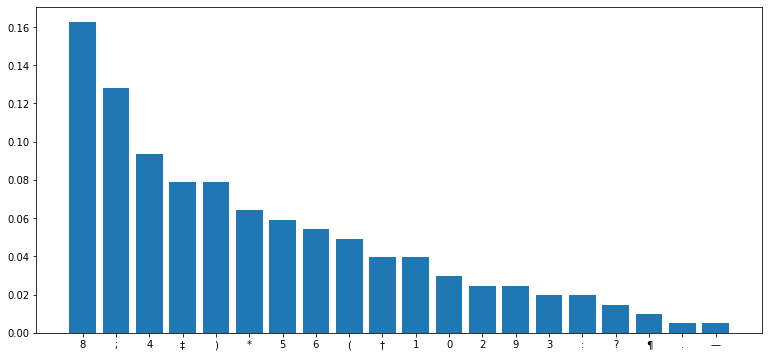

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6)) 
plt.bar(range(len(freqCryptogram)), list(freqCryptogram.values()), align='center')
plt.xticks(range(len(freqCryptogram)), list(freqCryptogram.keys()))

plt.show()

####*Corpora frequency analysis*  
The usage of a corpus is essential to decrypt following the same path of Legrand.  
Two corpora have been created to compare if letters frequencies changed during the centuries: the first one reflects the most frequent letters of the 19th century - Poe's time, while the second one depicts the contemporary frequencies of English letters.  
The decryption will be made using both frequency analyses, one at the time.  


 1. The first corpus has been created taking in consideration all the tales (retrieved from https://www.gutenberg.org/) written by the author Edgar Allan Poe, obviously with the exception of The Gold Bug. The texts have been transformed in lowercase and punctuation has been removed; then words have been split in letters in order to calculate their frequency. 

In [92]:
def noPunctuation(text):
  noPunct = []
  for word in text:
    if word.isalnum():
      noPunct.append(word)
  return noPunct

def noCAP(text):
  min = text.lower()
  return min

In [93]:
with open("EAP_tales.txt", mode="r", encoding="UTF-8") as EAP_tales: 
  tales = EAP_tales.read()
  ncTales = noCAP(tales)
  npTales = noPunctuation(ncTales)
  rTales = Recurrence(npTales)
  freqTales = Frequency(rTales)
  freqPoesTime1 = orderFreq(freqTales) #only first 26 results are alphabet's letters
  freqPoesTime = dict(list(freqPoesTime1.items())[:26])
  for (symbol,freq) in freqPoesTime.items():
    print("{:<2}: {:1.4f}".format(symbol,freq)) 

e : 0.1275
t : 0.0942
a : 0.0782
o : 0.0752
i : 0.0729
n : 0.0701
s : 0.0604
h : 0.0590
r : 0.0574
d : 0.0416
l : 0.0399
u : 0.0294
c : 0.0272
m : 0.0265
f : 0.0253
w : 0.0206
p : 0.0198
y : 0.0192
g : 0.0184
b : 0.0156
v : 0.0108
k : 0.0050
x : 0.0021
q : 0.0012
j : 0.0009
z : 0.0007


It can be better visualized through a bar chart:

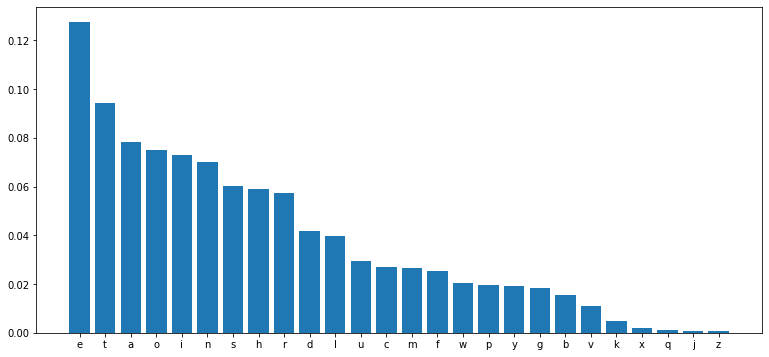

In [94]:
plt.figure(figsize=(13, 6)) 
plt.bar(range(len(freqPoesTime)), list(freqPoesTime.values()), align='center')
plt.xticks(range(len(freqPoesTime)), list(freqPoesTime.keys()))

plt.show()

2. Switching to nowadays letters frequencies, the following corpus has been created using COCA Corpus as a base, since it offers the list of the most frequent English words. Once that the Corpus of Contemporary American English has been downloaded (retrieved from www.wordfrequency.info), a .csv file has been created concatenating the column H "Words" of the third sheet "WordForms", together with column I "WordFreq". The .csv file is the starting point for the creation of letters' frequencies corpus.

In [96]:
from csv import reader
frequentEnglishWords = []
with open("WF.csv") as WF:
  next(WF)
  for row in WF:
    frequentEnglishWords.append(row.split()[0])

nop = noPunctuation(str(frequentEnglishWords))
nocap = (noCAP(''.join(nop)))
Rnop = Recurrence(nocap)
FRnop = Frequency(Rnop)
freqContemporary = orderFreq(FRnop)

for (symbol,freq) in freqContemporary.items():
  print("{:<2}: {:1.4f}".format(symbol,freq))

e : 0.1257
s : 0.0993
i : 0.0844
r : 0.0734
t : 0.0729
n : 0.0727
a : 0.0697
o : 0.0591
l : 0.0440
c : 0.0433
d : 0.0406
g : 0.0317
p : 0.0304
u : 0.0284
m : 0.0246
h : 0.0217
f : 0.0147
b : 0.0141
v : 0.0122
y : 0.0111
w : 0.0096
k : 0.0088
x : 0.0030
j : 0.0016
q : 0.0015
z : 0.0014


It can be better visualized through a bar chart:

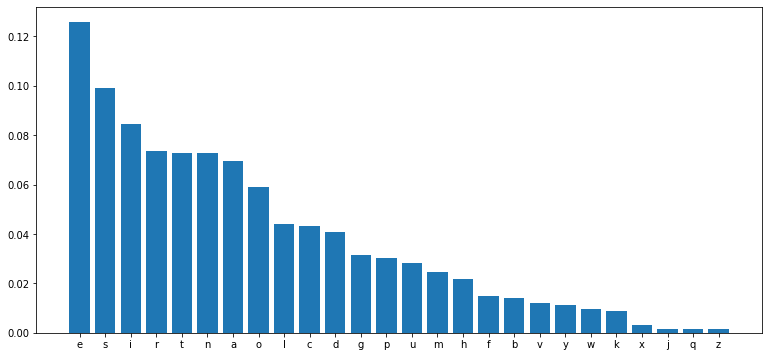

In [97]:
plt.figure(figsize=(13, 6)) 
plt.bar(range(len(freqContemporary)), list(freqContemporary.values()), align='center')
plt.xticks(range(len(freqContemporary)), list(freqContemporary.keys()))

plt.show()

####*Cracking the cryptogram in a computational way*  
Once obtained these three different frequency analyses, it is time to decrypt Legrand's cryptogram in a computational way, substituting the most frequent symbol with the corresponding most frequent letter of Poe's time (repeating the procedure for every symbol/English letter) and then doing it again, but with contemporary frequencies.

In [98]:
LfreqPoesTime = list(freqPoesTime)
LfreqContemporary = list(freqContemporary)

#function for the cryptogram's conversion, given a permutation and a corpus' frequency list
def mapping(PoeCryptogram, permutation, LfreqCorpus):
  dictMapping = dict(zip(list(permutation), LfreqCorpus[0:len(permutation)]))
  decryption = []
  for symbol in PoeCryptogram:
    if symbol in dictMapping:
      decryption.append(dictMapping[symbol])
  return decryption

The decryptions based on the letters' frequency at Poe's time is the following: (the original cryptogram is printed before to compare it with the solutions; afterwards the real solution of the cryptogram is proposed)

In [99]:
decryption = "A good glass in the bishop’s hostel in the devil’s seat forty-one degrees and thirteen minutes north-east and by north main branch seventh limb east side shoot from the left eye of the death’s-head a bee-line from the tree through the shot fifty feet out."
print(PoeCiphertext)
print()
for permutation in all_permutations:
  decrypted = mapping(PoeCryptogram, permutation, LfreqPoesTime)
  print(''.join(decrypted))
print()
print("The decryption proposed by Legrand is the following: {}".format(decryption))

53‡‡†305))6*;4826)4‡.)4‡);806*;48†8¶60))85;1‡(;:‡*8†83(88)5*†;46(;88*96*?;8)*‡(;485);5*†2:*‡(;4956*2(5*—4)8¶8*;4069285);)6†8)4‡‡;1(‡9;48081;8:8‡1;48†85;4)485†528806*81(‡9;48;(88;4(‡?34;48)4‡;161;:188;‡?;

sfoodfusiihntaechiaogiaoiteuhntaedeyhuiiestlortwonedefreeisndtahrteenmhnpteinortaesitsndcwnortamshncrsnbaieyentauhmcesitihdeiaootlromtaeuelteweoltaedestaiaesdsceeuhnelromtaetreetaropfataeiaotlhltwleetopt
sfoodfusiihntaechiaobiaoiteuhntaedeyhuiiestlortwonedefreeisndtahrteenmhnpteinortaesitsndcwnortamshncrsngaieyentauhmcesitihdeiaootlromtaeuelteweoltaedestaiaesdsceeuhnelromtaetreetaropfataeiaotlhltwleetopt
swoodwusiihntaechiaogiaoiteuhntaedeyhuiiestlortfonedewreeisndtahrteenmhnpteinortaesitsndcfnortamshncrsnbaieyentauhmcesitihdeiaootlromtaeueltefeoltaedestaiaesdsceeuhnelromtaetreetaropwataeiaotlhltfleetopt
swoodwusiihntaechiaobiaoiteuhntaedeyhuiiestlortfonedewreeisndtahrteenmhnpteinortaesitsndcfnortamshncrsngaieyentauhmcesitihdeiaootlromtaeueltefeoltaedestaiaesdsceeuhnelromtaetreetaropw

The decryptions based on the contemporary letters' frequency is the following: (the original cryptogram is printed before to compare it with the solutions; afterwards the real solution of the cryptogram is proposed)

In [100]:
print(PoeCiphertext)
print()
for permutation in all_permutations:
  decrypted = mapping(PoeCryptogram, permutation, LfreqContemporary)
  print(''.join(decrypted)) 
print()
print("The decryption proposed by Legrand is the following: {}".format(decryption))

53‡‡†305))6*;4826)4‡.)4‡);806*;48†8¶60))85;1‡(;:‡*8†83(88)5*†;46(;88*96*?;8)*‡(;485);5*†2:*‡(;4956*2(5*—4)8¶8*;4069285);)6†8)4‡‡;1(‡9;48081;8:8‡1;48†85;4)485†528806*81(‡9;48;(88;4(‡?34;48)4‡;161;:188;‡?;

amrrcmgattonsiepotirvtirtsegonsiecebogtteasdrlshrnecemleetancsiolseenuonfsetnrlsieatsancphnrlsiuaonplanyitebensigoupeatstocetirrsdlrusiegedseherdsieceasitieacapeegonedlrusiesleesilrfmisietirsdodshdeesrfs
amrrcmgattonsiepotirytirtsegonsiecebogtteasdrlshrnecemleetancsiolseenuonfsetnrlsieatsancphnrlsiuaonplanvitebensigoupeatstocetirrsdlrusiegedseherdsieceasitieacapeegonedlrusiesleesilrfmisietirsdodshdeesrfs
ahrrchgattonsiepotirvtirtsegonsiecebogtteasdrlsmrnecehleetancsiolseenuonfsetnrlsieatsancpmnrlsiuaonplanyitebensigoupeatstocetirrsdlrusiegedsemerdsieceasitieacapeegonedlrusiesleesilrfhisietirsdodsmdeesrfs
ahrrchgattonsiepotirytirtsegonsiecebogtteasdrlsmrnecehleetancsiolseenuonfsetnrlsieatsancpmnrlsiuaonplanvitebensigoupeatstocetirrsdlrusiegedsemerdsieceasitieacapeegonedlrusiesleesilrfh

An analysis of the results and considerations about them will be presented in the third chapter's second paragraph of the above-mentioned Bachelor thesis.

####*Encryption*    
Even the opposite process can be accomplished in a computational way, i.e. the encryption.  

Following modern developments, the kind of encryption proposed by Edgar Allan Poe appears undoubtedly obsolete. Consequently, libraries like *cryptography* allow the creation of ciphertexts based on the AES Algorithm, which is not unbreakable, but it still has an higher level of security than Poe's.  
The code that follows has been retrieved from https://www.thepythoncode.com/article/encrypt-decrypt-files-symmetric-python and has been adapted to Legrand's cryptogram.

In [101]:
!pip install cryptography
from cryptography.fernet import Fernet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 4.1 MB/s 


In [102]:
key = Fernet.generate_key()
with open("AES_key.txt", "wb") as key_file:
  key_file.write(key)

message = decryption.encode('utf8')
f = Fernet(key)
encrypted = f.encrypt(message)
print(encrypted)

b'gAAAAABjJEgfLs05UlEralEgLZm2oioZFKVtH6oeTTqHDpBLaFj-dZaa4g7-LcoAR4fEXcDCeb4tBEerZXa8rrbaqjl80hnoSJLkMm3JzS8Nhmmw8Hug4lvsUvK_mk_2NDqUS9fZMGs4cjo-MN4tXRMy1RDLoIawyyx_W015izsvq68G-iRt5CIiYS9XQFcbUMuNrMHtKPfOriI3UklvT-IrQqqgRDYBL2KYwvuVJSDOhR76w4GPOcWWv4w2h0Ox9fRcsKsPudh0WzR2bh3QZR4akbdwcvvL0XgvYgeyf0MhYWFk_W0S0qaNdErzL4-d7JZkQEluMJOM72z6TNZHhAI4WERgX2gGL4yG9yPaU7il3-PyhumnYCvznwKr09kLszuptuMbm13Ho3QsAEY28iI0QXT5SPjF31GIVox0qEc6D4Isv8gy1lk='


Another way to encrypt the message using more modern technologies is generating both a public and a private key through the library *rsa*. In this case only the former is necessary since the latter allows the decryption.  
The code has been retrieved and adapted from https://stuvel.eu/python-rsa-doc/usage.html#generating-keys

In [103]:
import rsa
(pubkey, privkey) = rsa.newkeys(2162) #"RSA can only encrypt messages that are smaller than the key. A couple of bytes are lost on random padding, and the rest is available for the message itself."
keys = (pubkey, privkey)

with open("rsa.text", 'w+') as fp:
  fp.write(pubkey.save_pkcs1().decode())
  fp.write(privkey.save_pkcs1().decode())

message = decryption.encode('utf8')
crypto = rsa.encrypt(message, pubkey)
print(crypto)

b'\x00\xe7P\xeb\x8f\xc6}\xd6\xaa\xfb\xf6\xb8\xfba\xaa_d\x1e\xc8-\xd5\xa6\x10\xc5s|!/y\xfc\xf1B\x10}Ra\xa7D\x975G\xa3\xe0;\x18%GJX\xd4c\x1f\xb9\xebq-+\xb8v\xf5\xe3\xa4\xa9F6\xd3\x85E1\\:\x04\xc3$E\xe9|\xe0\x8cL\x18\x17|M\x15hD\xd4\x0c\x91\xfe\x85\xf1\xb7]ja=?%t\xbbk\x17>\x1d$t\x91\xe0\x8d\xcd\xb1\x93\xbe\x12\xc4\xdb[\x19\xf4B2\xa9\x9e\r\x03\xbf\x14\n\x1c1\x97E\xe2"\xba\x8bw\x9c\n\xc9\xfa\xf2\xfc\xb0\xbf\xc2\xed\xfaT\xe2\xa3\x8al\xb7\xcc32\x8b\xfc+c-\xda\x19\xa9\x89\x8b2x\xd0\x82V )q\xf4c\xa0l\x08\x1d\xb1\xb9\r>e\xde?T\x814\xcd+\xce\xf1\xa0g\xcfE\x86\xcb\xf6\xeb\x1a\xf9\x8dE\'<p06\xaa\x18\x1b\xf0/\xeb\xaa\x06\xe0\xd1\xe6\xe4\xd3m\xb9J3\x91\xef\xaf\xf9\xbcCIy\x98{\xd5XAG_\xd2{\x98\x06\x86\x1dl\t[\x1d(4\x81\xf3]\xf1\x7f\xfd\x84\xc8\xb0*\xf4 7'
